## Distribuciones logintudinales de las EAS

### Objetivo: 
Establecer las diferencias en el desarrollo de la lluvia para 3 primarios diferentes: hierro, protón y fotón.

### Tareas:

1. Graficar los perfiles logitudinales de los tres primarios, para las tres componentes.
2. Calcular el X$_{max}$ de cada uno de estos.
3. Repetir el ejercicio con los perfiles logitudinales de lluvias de cada especie. En este el calculo será  $\langle$X$_{max}$$\rangle$. 
4. Distribución longitudinal promedio.

A continuación se encuentra un ejemplo de como sería la primera parte para el fotón.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

import os

In [2]:
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', titlesize=20)
plt.rc("legend", fontsize=18)

In [3]:
os.chdir("/home/csarmiento/MEGA/Laboratorio_6_y_7/SimulacionesCorsika")
os.getcwd()

'/home/csarmiento/MEGA/Laboratorio_6_y_7/SimulacionesCorsika'

In [4]:
df= pd.read_table(r"mge_1_Photon/DAT199900.long", delimiter=" ", skiprows=2, skipinitialspace=True, 
                  names=["DEPTH", "GAMMAS", "POSITRONS", "ELECTRONS", "MU+", "MU-", 
                         "HADRONS", "CHARGED", "NUCLEI", "CHERENKOV"])
df.head()

,DEPTH,GAMMAS,POSITRONS,ELECTRONS,MU+,MU-,HADRONS,CHARGED,NUCLEI,CHERENKOV
0,10.,1.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00
1,20.,1.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00
2,30.,1.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00
3,40.,1.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00
4,50.,1.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00


In [5]:
df.columns = df.columns.str.lstrip()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 10 columns):
DEPTH        185 non-null object
GAMMAS       185 non-null object
POSITRONS    185 non-null object
ELECTRONS    184 non-null object
MU+          184 non-null object
MU-          184 non-null object
HADRONS      183 non-null object
CHARGED      182 non-null object
NUCLEI       181 non-null object
CHERENKOV    181 non-null object
dtypes: object(10)
memory usage: 14.6+ KB


In [7]:
#Conversión de string a float de algunas variables
#
df['DEPTH'] = pd.to_numeric(df['DEPTH'],errors='coerce')
df['CHARGED'] = pd.to_numeric(df['CHARGED'],errors='coerce')

In [8]:
dg=df[0:89]

In [9]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
DEPTH        89 non-null float64
GAMMAS       89 non-null object
POSITRONS    89 non-null object
ELECTRONS    89 non-null object
MU+          89 non-null object
MU-          89 non-null object
HADRONS      89 non-null object
CHARGED      89 non-null float64
NUCLEI       89 non-null object
CHERENKOV    89 non-null object
dtypes: float64(2), object(8)
memory usage: 7.1+ KB


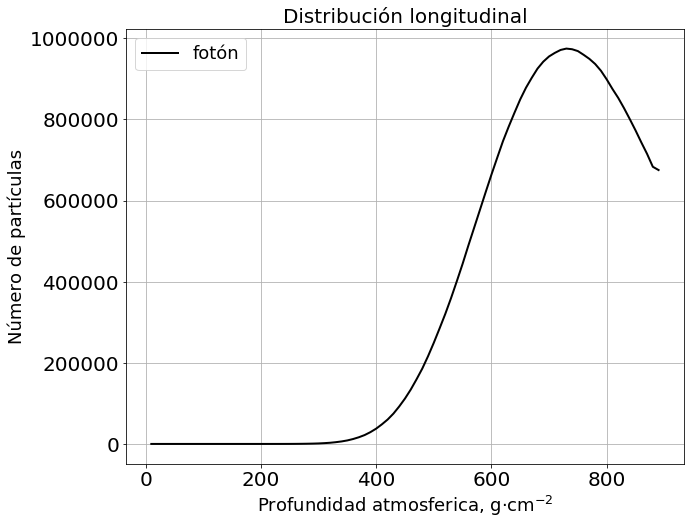

In [10]:
plt.figure(figsize=(10,8))
plt.plot(dg["DEPTH"], dg["CHARGED"], color="k", linewidth=2, label="fotón");
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
plt.title("Distribución longitudinal")
plt.xlabel(r"Profundidad atmosferica, g$\cdot$cm$^{-2}$")
plt.ylabel(r"Número de partículas")
plt.legend()
plt.grid()
plt.show()

In [11]:
dh=df[91:175]
dh.head()

,DEPTH,GAMMAS,POSITRONS,ELECTRONS,MU+,MU-,HADRONS,CHARGED,NUCLEI,CHERENKOV
91,5.0,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.0,0.00000E+00,0.00000E+00
92,15.0,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.0,0.00000E+00,0.00000E+00
93,25.0,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.0,0.00000E+00,0.00000E+00
94,35.0,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.0,0.00000E+00,0.00000E+00
95,45.0,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.0,0.00000E+00,0.00000E+00


In [12]:
# Rename multiple columns
dh.rename(columns = {"POSITRONS":"EM IONIZ", "ELECTRONS":"EM CUT", "MU+":"MU IONIZ", "MU-":"MU CUT", 
                         "HADRONS":"HADR IONIZ", "CHARGED":"HADR CUT", "NUCLEI":"NEUTRINO", "CHERENKOV":"SUM"}, 
          inplace="True")
dh.head(4)

/usr/lib/python3/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,DEPTH,GAMMAS,EM IONIZ,EM CUT,MU IONIZ,MU CUT,HADR IONIZ,HADR CUT,NEUTRINO,SUM
91,5.0,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.0,0.00000E+00,0.00000E+00
92,15.0,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.0,0.00000E+00,0.00000E+00
93,25.0,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.0,0.00000E+00,0.00000E+00
94,35.0,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.0,0.00000E+00,0.00000E+00


In [13]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 91 to 174
Data columns (total 10 columns):
DEPTH         84 non-null float64
GAMMAS        84 non-null object
EM IONIZ      84 non-null object
EM CUT        84 non-null object
MU IONIZ      84 non-null object
MU CUT        84 non-null object
HADR IONIZ    84 non-null object
HADR CUT      84 non-null float64
NEUTRINO      84 non-null object
SUM           84 non-null object
dtypes: float64(2), object(8)
memory usage: 6.7+ KB


In [14]:
dh['SUM'] = pd.to_numeric(dh['SUM'],errors='coerce')
dh['GAMMAS'] = pd.to_numeric(dh['GAMMAS'],errors='coerce')

<ipython-input-14-12479e0b6299>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh['SUM'] = pd.to_numeric(dh['SUM'],errors='coerce')
<ipython-input-14-12479e0b6299>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh['GAMMAS'] = pd.to_numeric(dh['GAMMAS'],errors='coerce')


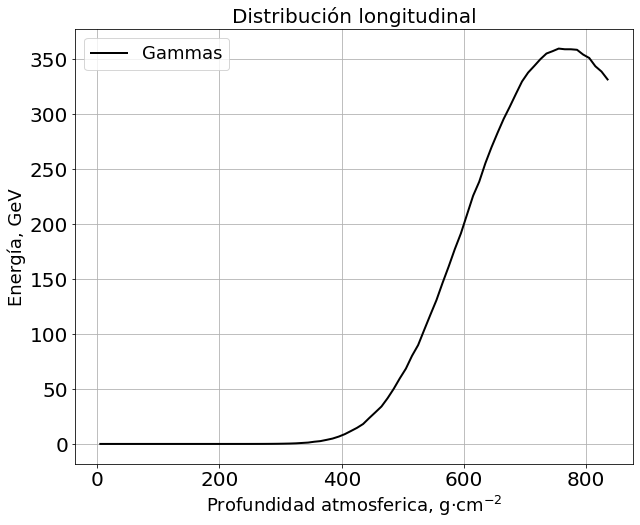

In [15]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10,8))
plt.plot(dh["DEPTH"], dh["GAMMAS"], color="k", linewidth=2, label="Gammas")
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
plt.title("Distribución longitudinal")
plt.xlabel(r"Profundidad atmosferica, g$\cdot$cm$^{-2}$")
plt.ylabel(r"Energía, GeV")
plt.legend()

plt.grid()
plt.show()